# Métricas de Risco <a class="anchor" id="5"></a>

In [1]:
# Bibliotecas
import datetime as dt
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

1. É possível o ES apresentar um valor menor (em módulo) que o VaR:   
a) sob o mesmo nível de confiança?   
b) sob um nível de confiança maior (ex: ES 95% e VaR 99%)?   
c) sob um nível de confiança menor (ex: ES 99% e VaR 95%)?

Respostas

a) Não. Sob o mesmo nível de confiança, o ES será sempre maior (em módulo) que o VaR.   
Como o ES é o valor médio dos estouros do VaR, se o valor do VaR fosse -0,15, por exemplo, o ES ficaria sempre abaixo desse valor (-0,18, por exemplo). No entanto, colocando esses valores em módulo, o ES seria sempre maior que o VaR.

b) Sim. Sob um nível de confiança maior (ex: ES 95% e VaR 99%), o ES pode ser menor (em módulo) que o VaR.   
Pensando em um gráfico de distribuição normal, o valor do VaR com 99% de confiança estaria mais à esquerda em relação ao VaR com 95%.   
Com isso, o valor do ES com 95% de confiança poderia estar à direita em relação ao VaR com 99%, ou seja, o ES poderia ser menor (em módulo) que o VaR.

c) Não. Sob um nível de confiança menor (ex: ES 99% e VaR 95%), o ES será sempre maior (em módulo) que o VaR.   
Assim como no item b, se pensarmos no mesmo gráfico de distribuição, o valor do VaR com 95% de confiança estaria mais à direita em relação ao VaR com 99%.   
Com isso, o valor do ES com 99% de confiança estaria sempre à esquerda em relação ao VaR com 95%, ou seja, o ES seria sempre maior (em módulo) que o VaR.

---

2. Calcule o VaR histórico com nível de confiança de 95% e HP=1, para a última data disponível de USD Spot (30/04/2021), utilizando uma amostra de 500 dias.

In [2]:
# Captura dos dados
def read_fx_input(fx_name='BRL=X'):
    df = si.get_data('BRL=X', start_date = '04/01/2010', end_date='30/04/2021', index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

df_inputs = read_fx_input()

def calc_ret_pnl(df, hp):
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    return df

df_metrics = calc_ret_pnl(df_inputs, hp=1)

amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-500:len(df_metrics)]

alpha = 0.05
var = amostra_PnL.quantile(alpha)

print('"BRL=X" com última data disponível em 30/04/2021\n')
print('HP=1 e amostra de 500 dias\n')
print("VaR 95% = R$ " + "{:.2f}".format(-var))

"BRL=X" com última data disponível em 30/04/2021

HP=1 e amostra de 500 dias

VaR 95% = R$ 0.10


---

Fazendo com __'ITUB4.SA'__ sem usar end_date='30/04/2021'

In [3]:
# Captura dos dados
def read_fx_input(fx_name='ITUB4.SA'):
    df = si.get_data('ITUB4.SA', start_date = '01/01/2010', index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

df_inputs = read_fx_input()

def calc_ret_pnl(df, hp):
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    return df

df_metrics = calc_ret_pnl(df_inputs, hp=1)

amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-500:len(df_metrics)]

alpha = 0.05
var = amostra_PnL.quantile(alpha)

print('ITUB4.SA\n')
print('HP=1 e amostra de 500 dias\n')
print("VaR 95% = R$ " + "{:.2f}".format(-var))

ITUB4.SA

HP=1 e amostra de 500 dias

VaR 95% = R$ 0.83


---

3. Calcule o ES histórico com nível de confiança de 97,5% e HP=1, para a última data disponível de USD Spot (30/04/2021), utilizando uma amostra de 1000 dias.

In [4]:
# Captura dos dados
def read_fx_input(fx_name='BRL=X'):
    df = si.get_data('BRL=X', start_date = '04/01/2010', end_date='30/04/2021', index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

df_inputs = read_fx_input()

def calc_ret_pnl(df, hp):
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    return df

df_metrics = calc_ret_pnl(df_inputs, hp=1)

amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-1000:len(df_metrics)]

print('"BRL=X" com última data disponível em 30/04/2021\n')
print('HP=1 e amostra de 1000 dias\n')

alpha = 0.025
var = amostra_PnL.quantile(alpha)
print("VaR 97,5% = R$ " + "{:.2f}".format(-var))

es = amostra_PnL[amostra_PnL <= var].mean()
print("ES 97,5% = R$ " + "{:.2f}".format(-es))

"BRL=X" com última data disponível em 30/04/2021

HP=1 e amostra de 1000 dias

VaR 97,5% = R$ 0.11
ES 97,5% = R$ 0.15


---

Fazendo com __'ITUB4.SA'__ sem usar end_date='30/04/2021'

In [5]:
# Captura dos dados
def read_fx_input(fx_name='ITUB4.SA'):
    df = si.get_data('ITUB4.SA', start_date = '01/01/2010', index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

df_inputs = read_fx_input()

def calc_ret_pnl(df, hp):
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    return df

df_metrics = calc_ret_pnl(df_inputs, hp=10)

amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-1000:len(df_metrics)]

print('ITUB4.SA\n')
print('HP=1 e amostra de 1000 dias\n')

alpha = 0.025
var = amostra_PnL.quantile(alpha)
print("VaR 97,5% = R$ " + "{:.2f}".format(-var))

es = amostra_PnL[amostra_PnL <= var].mean()
print("ES 97,5% = R$ " + "{:.2f}".format(-es))

ITUB4.SA

HP=1 e amostra de 1000 dias

VaR 97,5% = R$ 3.42
ES 97,5% = R$ 5.14


---

4. Calcule a série temporal de VaR 99% e 97,5%, com HP=1, utilizando uma amostra de 1000 dias para todas as datas possíveis.   
Dica: Há 2844 dias com preços na base, removendo HP=1 para cálculo do primeiro retorno e 1000 para amostra do 1º VaR, teremos como resultado uma série de VaRs de tamanho 1843.

_Obs.: A dica acima não condiz com as bases do Yahoo Finance utilizadas abaixo._

In [6]:
# Captura dos dados
def read_fx_input(fx_name='BRL=X'):
    df = si.get_data('BRL=X', start_date = '04/01/2010', end_date='30/04/2021', index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

df_inputs = read_fx_input()

def calc_ret_pnl(df, hp):
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    return df

df_metrics = calc_ret_pnl(df_inputs, hp=1)

list_var_99 = []
list_var_975 = []
list_datas = []

# Iterando de trás para frente, pois a "amostra_PnL" pega primeiro os 1000 dias mais recentes. 
for i in range(len(df_metrics), 0, -1): 
    amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-1000-i:len(df_metrics)-i]
    list_var_99.append(amostra_PnL.quantile(0.01))
    list_var_975.append(amostra_PnL.quantile(0.025))
    list_datas.append(df_metrics.index[len(df_metrics)-i])
    
df_vars = pd.DataFrame()
df_vars['Data'] = list_datas
df_vars.set_index('Data', inplace=True)
df_vars['VaR 99%'] = list_var_99
df_vars['VaR 97,5%'] = list_var_975

In [7]:
df_vars

,VaR 99%,"VaR 97,5%"
Data,,
2010-03-31,NaN,NaN
2010-04-01,NaN,NaN
2010-04-04,NaN,NaN
2010-04-05,NaN,NaN
2010-04-06,NaN,NaN
...,...,...
2021-04-25,-0.146179,-0.113083
2021-04-26,-0.146179,-0.113083
2021-04-27,-0.146179,-0.113083


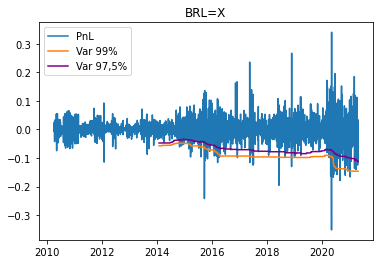

In [8]:
plt.plot(df_metrics['PnL'], label='PnL')
plt.plot(df_vars['VaR 99%'], label='Var 99%')
plt.plot(df_vars['VaR 97,5%'], label='Var 97,5%', color='purple')
plt.legend()
plt.title('BRL=X');

---

Fazendo com __'ITUB4.SA'__ sem usar end_date='30/04/2021'

In [9]:
# Captura dos dados
def read_fx_input(fx_name='ITUB4.SA'):
    df = si.get_data('ITUB4.SA', start_date = '01/01/2010', index_as_date = True, interval = '1d')
    df = df.loc[:,['adjclose']]
    df.columns = ['price']
    return df

df_inputs = read_fx_input()

def calc_ret_pnl(df, hp):
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    return df

df_metrics = calc_ret_pnl(df_inputs, hp=1)

list_var_99 = []
list_var_975 = []
list_datas = []

# Iterando de trás para frente, pois a "amostra_PnL" pega primeiro os 1000 dias mais recentes. 
for i in range(len(df_metrics), 0, -1): 
    amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-1000-i:len(df_metrics)-i]
    list_var_99.append(amostra_PnL.quantile(0.01))
    list_var_975.append(amostra_PnL.quantile(0.025))
    list_datas.append(df_metrics.index[len(df_metrics)-i])
    
df_vars = pd.DataFrame()
df_vars['Data'] = list_datas
df_vars.set_index('Data', inplace=True)
df_vars['VaR 99%'] = list_var_99
df_vars['VaR 97,5%'] = list_var_975

In [10]:
df_vars

,VaR 99%,"VaR 97,5%"
Data,,
2010-01-04,NaN,NaN
2010-01-05,NaN,NaN
2010-01-06,NaN,NaN
2010-01-07,NaN,NaN
2010-01-08,NaN,NaN
...,...,...
2022-05-25,-1.507258,-1.109021
2022-05-26,-1.507258,-1.109021
2022-05-27,-1.507258,-1.109021


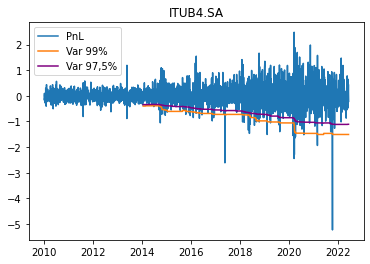

In [11]:
plt.plot(df_metrics['PnL'], label='PnL')
plt.plot(df_vars['VaR 99%'], label='Var 99%')
plt.plot(df_vars['VaR 97,5%'], label='Var 97,5%', color='purple')
plt.legend()
plt.title('ITUB4.SA');